# **1. Introduction**

The purpose of marketing is to drive sales and although the goal of each ad campaign will vary, the goal of businesses and companies is to sell more to more people, more often and at higher prices. 

**Problem:**  Some small and large businesses lose a lot of money on bad marketing campaigns because they are not targeting potential customers.

As a small business, we cannot afford to lose money on bad marketing campaigns; we need to get our marketing message directly to prospective consumers, not to everyone.

**Solution:** predicting the number of sales can save businesses a lot of money by not targeting people who might have a low probability of buying a product or service. Forecasting sales will allow them to focus on those who have the highest likelihood of buying a product or service.

In a performance-based model, advertisers pay for consumers activities that drive a campaign goal (**sales**). That’s why predicting the number of sales is an important information for companies and advertisers. Because knowing the number of sales in advance can help businesses and other entities figure out if their advertising strategy is worth it or not. After all, we want to make money, not lose it. 

Therefore, this analysis will predict the total number of people who buy the product after seeing the ad (Approved Conversion).

# **2. Data**

The original dataset is called *KAG_conversion_data* and was downloaded from Kaggle website: [Sales Conversion Optimization](https://www.kaggle.com/loveall/clicks-conversion-tracking).

The data is about an organization's social media ad campaign. It contains 1143 observations and 11 variables. 

Approved Conversion, which represents the total number of people who bought the product after seeing the ad, will be the target variable. Because it's a continuos variable, we are dealing with a regression task.


**Load the Dataset**

In [42]:
# Install the relevant packages
install.packages("ggplot2")
install.packages('ggpubr')
install.packages("corrplot")
install.packages("GGally")


  There is a binary version available but the source version is later:
       binary source needs_compilation
GGally  2.1.1  2.1.2             FALSE



installing the source package 'GGally'



In [43]:
# Import the relevant libraries
library(ggplot2)
library(ggpubr)
library(corrplot)
library(car)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [3]:
# Read the raw data from the source into a DataFrame
df <- read.csv("KAG_conversion_data.csv", header = TRUE)

# **3. Methodology**

### **Exploratory Data Analysis (EDA)**

In this step, I will apply statistics and visualization techniques to gain a better understanding of the dataset and I will also eliminate any problems from the dataset which would prevent further analysis.

In [4]:
# Use the str and summary functions to get an understanding of the DataFrame
str(df)

'data.frame':	1143 obs. of  11 variables:
 $ ad_id              : int  708746 708749 708771 708815 708818 708820 708889 708895 708953 708958 ...
 $ xyz_campaign_id    : int  916 916 916 916 916 916 916 916 916 916 ...
 $ fb_campaign_id     : int  103916 103917 103920 103928 103928 103929 103940 103941 103951 103952 ...
 $ age                : Factor w/ 4 levels "30-34","35-39",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender             : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ interest           : int  15 16 20 28 28 29 15 16 27 28 ...
 $ Impressions        : int  7350 17861 693 4259 4133 1915 15615 10951 2355 9502 ...
 $ Clicks             : int  1 2 0 1 1 0 3 1 1 3 ...
 $ Spent              : num  1.43 1.82 0 1.25 1.29 ...
 $ Total_Conversion   : int  2 2 1 1 1 1 1 1 1 1 ...
 $ Approved_Conversion: int  1 0 0 0 1 1 0 1 0 0 ...


In [5]:
summary(df)

     ad_id         xyz_campaign_id fb_campaign_id      age      gender 
 Min.   : 708746   Min.   : 916    Min.   :103916   30-34:426   F:551  
 1st Qu.: 777633   1st Qu.: 936    1st Qu.:115716   35-39:248   M:592  
 Median :1121185   Median :1178    Median :144549   40-44:210          
 Mean   : 987261   Mean   :1067    Mean   :133784   45-49:259          
 3rd Qu.:1121805   3rd Qu.:1178    3rd Qu.:144658                      
 Max.   :1314415   Max.   :1178    Max.   :179982                      
    interest       Impressions          Clicks           Spent       
 Min.   :  2.00   Min.   :     87   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.00   1st Qu.:   6504   1st Qu.:  1.00   1st Qu.:  1.48  
 Median : 25.00   Median :  51509   Median :  8.00   Median : 12.37  
 Mean   : 32.77   Mean   : 186732   Mean   : 33.39   Mean   : 51.36  
 3rd Qu.: 31.00   3rd Qu.: 221769   3rd Qu.: 37.50   3rd Qu.: 60.02  
 Max.   :114.00   Max.   :3052003   Max.   :421.00   Max.   :639.95  
 Total

It can be seen from the output that this dataset contains 1143 observations and 11 variables. 

Moreover, 8 fields are integers, 2 are factors (strings) and 1 is float. The essential difference between these variable types is that continuous variables can take a potentially unlimited number of values, while categorical variables can take only a limited number of categories as their values.

In [6]:
# Print the first 5 rows of the DataFrame
head(df, 5)


ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
708746,916,103916,30-34,M,15,7350,1,1.43,2,1
708749,916,103917,30-34,M,16,17861,2,1.82,2,0
708771,916,103920,30-34,M,20,693,0,0.00,1,0
708815,916,103928,30-34,M,28,4259,1,1.25,1,0
708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Detecting Missing Values**

In [7]:
# Count total missing values in each column of the dataframe
sapply(df, function(x) sum(is.na(x)))

ad_id     xyz_campaign_id      fb_campaign_id                 age 
                  0                   0                   0                   0 
             gender            interest         Impressions              Clicks 
                  0                   0                   0                   0 
              Spent    Total_Conversion Approved_Conversion 
                  0                   0                   0

The dataset has no missing values.

In [8]:
# Get univariate statistics to 
# summarize the central tendency, dispersion, 
# and shape of a dataset’s distribution

summary(df)

     ad_id         xyz_campaign_id fb_campaign_id      age      gender 
 Min.   : 708746   Min.   : 916    Min.   :103916   30-34:426   F:551  
 1st Qu.: 777633   1st Qu.: 936    1st Qu.:115716   35-39:248   M:592  
 Median :1121185   Median :1178    Median :144549   40-44:210          
 Mean   : 987261   Mean   :1067    Mean   :133784   45-49:259          
 3rd Qu.:1121805   3rd Qu.:1178    3rd Qu.:144658                      
 Max.   :1314415   Max.   :1178    Max.   :179982                      
    interest       Impressions          Clicks           Spent       
 Min.   :  2.00   Min.   :     87   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 16.00   1st Qu.:   6504   1st Qu.:  1.00   1st Qu.:  1.48  
 Median : 25.00   Median :  51509   Median :  8.00   Median : 12.37  
 Mean   : 32.77   Mean   : 186732   Mean   : 33.39   Mean   : 51.36  
 3rd Qu.: 31.00   3rd Qu.: 221769   3rd Qu.: 37.50   3rd Qu.: 60.02  
 Max.   :114.00   Max.   :3052003   Max.   :421.00   Max.   :639.95  
 Total

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


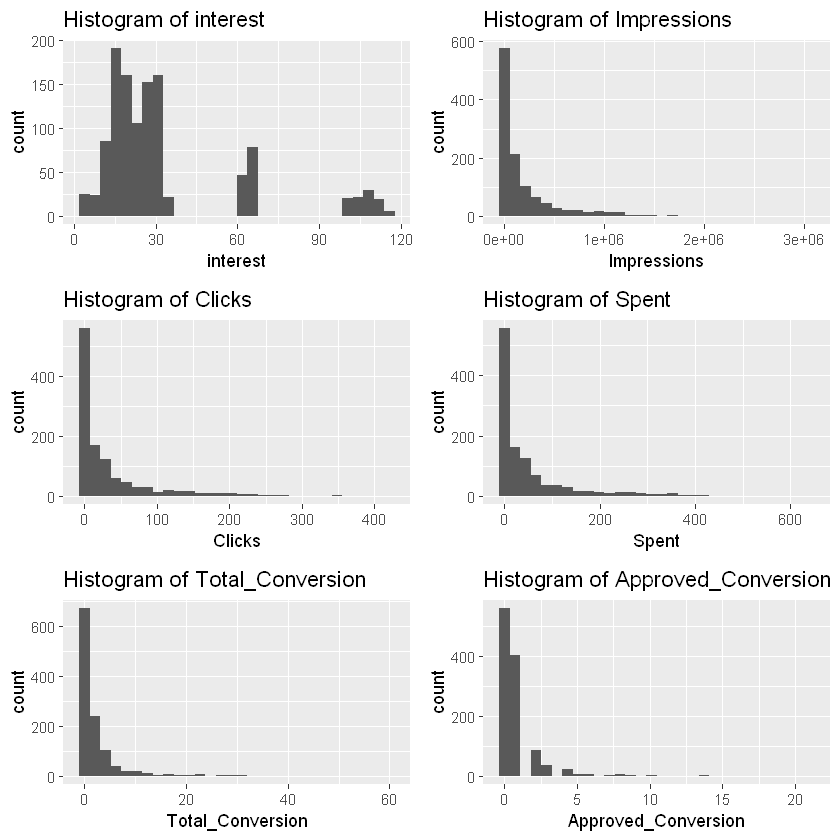

In [9]:
# Univariate visualization of the continuous variables 
# Plot histograms to get a sense of their distribution

h_1 <- ggplot(df, aes(x=interest)) + 
    geom_histogram() +
    ggtitle("Histogram of interest")

h_2 <- ggplot(df, aes(x=Impressions)) + 
    geom_histogram() +
    ggtitle("Histogram of Impressions")

h_3 <- ggplot(df, aes(x=Clicks)) + 
    geom_histogram() +
    ggtitle("Histogram of Clicks")

h_4 <- ggplot(df, aes(x=Spent)) + 
    geom_histogram() +
    ggtitle("Histogram of Spent")

h_5 <- ggplot(df, aes(x=Total_Conversion)) + 
    geom_histogram() +
    ggtitle("Histogram of Total_Conversion")

h_6 <- ggplot(df, aes(x=Approved_Conversion)) + 
    geom_histogram() +
    ggtitle("Histogram of Approved_Conversion")

ggarrange(h_1, h_2, h_3, h_4, h_5, h_6, ncol=2, nrow=3)

The above variables are not normally distributed. The histograms of impressions, clicks, spent, total conversion and approved conversion depict highly skewed distributions (positively skewed). Therefore, these variables could have potential outliers. 

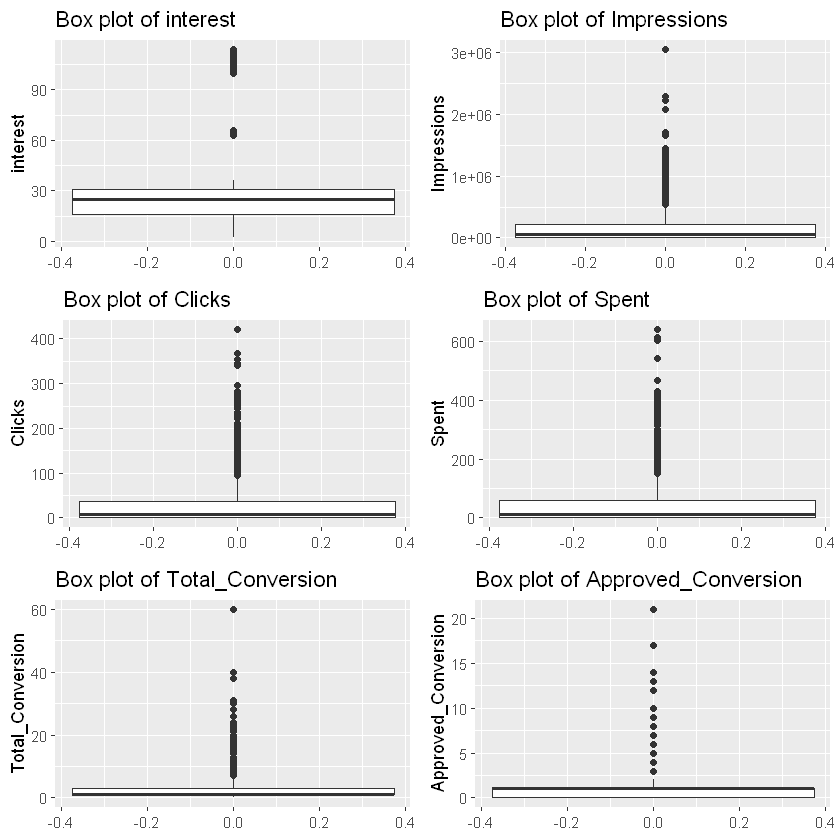

In [10]:
# Visually detect outliers with boxplots
bp_1 <- ggplot(df, aes(y=interest)) +
    geom_boxplot() + 
    ggtitle("Box plot of interest")

bp_2 <- ggplot(df, aes(y=Impressions)) +
    geom_boxplot() + 
    ggtitle("Box plot of Impressions")

bp_3 <- ggplot(df, aes(y=Clicks)) +
    geom_boxplot() + 
    ggtitle("Box plot of Clicks")

bp_4 <- ggplot(df, aes(y=Spent)) +
    geom_boxplot() + 
    ggtitle("Box plot of Spent")

bp_5 <- ggplot(df, aes(y=Total_Conversion)) +
    geom_boxplot() + 
    ggtitle("Box plot of Total_Conversion")

bp_6 <- ggplot(df, aes(y=Approved_Conversion)) +
    geom_boxplot() + 
    ggtitle("Box plot of Approved_Conversion")

ggarrange(bp_1, bp_2, bp_3, bp_4, bp_5, bp_6, ncol=2, nrow=3)

We can see that the above variables have outliers. These can be problematic because they can affect the results of our model.

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


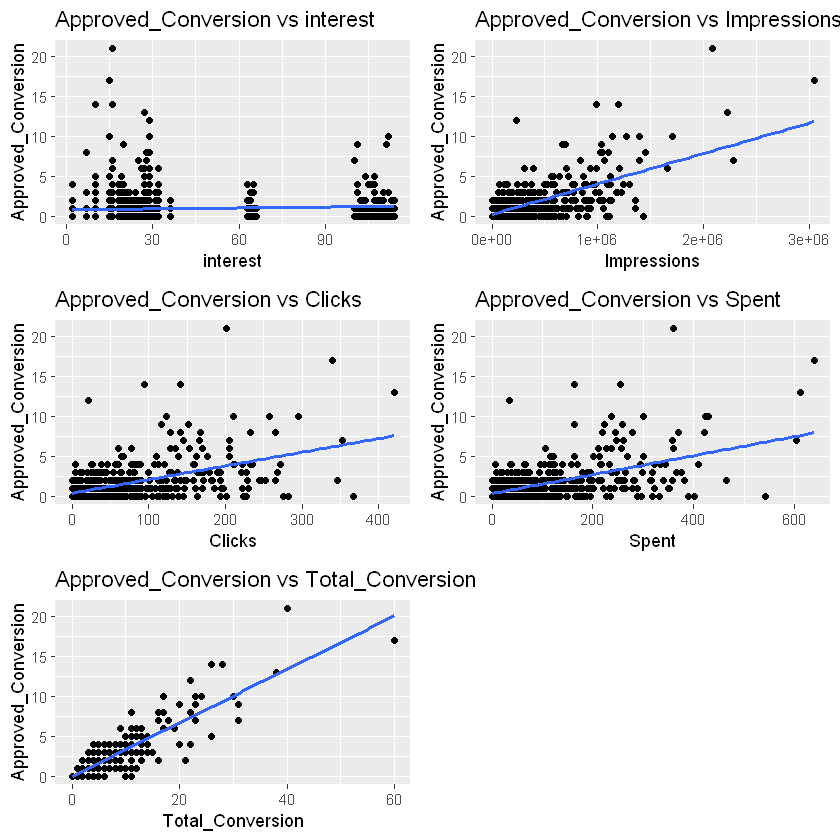

In [11]:
# Bivariate analysis of two continuous variables

# Plot scatter plots to look at the relationship between the response variable 
# and the predictor variables (if the first variable's value usually goes up 
# when the second one goes up, then this indicates a positive relationship.)

s_1 <- ggplot(df, aes(x=interest, y=Approved_Conversion)) +
    geom_point() +
    xlab("interest") +
    ylab("Approved_Conversion") +
    ggtitle("Approved_Conversion vs interest") + 
    geom_smooth(method="lm", se=FALSE)

s_2 <- ggplot(df, aes(x=Impressions, y=Approved_Conversion)) +
    geom_point() +
    xlab("Impressions") +
    ylab("Approved_Conversion") +
    ggtitle("Approved_Conversion vs Impressions") + 
    geom_smooth(method="lm", se=FALSE)

s_3 <- ggplot(df, aes(x=Clicks, y=Approved_Conversion)) +
    geom_point() +
    xlab("Clicks") +
    ylab("Approved_Conversion") +
    ggtitle("Approved_Conversion vs Clicks") + 
    geom_smooth(method="lm", se=FALSE)

s_4 <- ggplot(df, aes(x=Spent, y=Approved_Conversion)) +
    geom_point() +
    xlab("Spent") +
    ylab("Approved_Conversion") +
    ggtitle("Approved_Conversion vs Spent") + 
    geom_smooth(method="lm", se=FALSE)

s_5 <- ggplot(df, aes(x=Total_Conversion, y=Approved_Conversion)) +
    geom_point() +
    xlab("Total_Conversion") +
    ylab("Approved_Conversion") +
    ggtitle("Approved_Conversion vs Total_Conversion") + 
    geom_smooth(method="lm", se=FALSE)

ggarrange(s_1, s_2, s_3, s_4, s_5, ncol=2, nrow=3)

Approved_Conversion vs interest: We can see that there is no clear relationship (positive or negative) between the response, Approved_Conversion, and interest.

Impressions, clicks and spent have weak positive relationship with Approved_Conversion. As the variable on the x-axis increases, the response variable increases as well. The dots are fairly spread out, which indicates a weak relationship. 

Lastly, it can be seen that Total_Conversion has a strong positive relationship with Approved_Conversion. As Total_Conversion increases, the response variable increases as well. Moreover, the dots are packed together tightly, which indicates a strong relationship. 

In [12]:
# Create correlation matrix between each pairwise combination of numeric variables (rounded to 3 decimal places) 
# to view the linear correlation coefficients between each pair of variables

round(cor(df[c("interest", "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion")]),3)

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
interest,1.000,0.102,0.089,0.070,0.120,0.058
Impressions,0.102,1.000,0.949,0.970,0.813,0.684
Clicks,0.089,0.949,1.000,0.993,0.695,0.560
Spent,0.070,0.970,0.993,1.000,0.725,0.593
Total_Conversion,0.120,0.813,0.695,0.725,1.000,0.864
Approved_Conversion,0.058,0.684,0.560,0.593,0.864,1.000


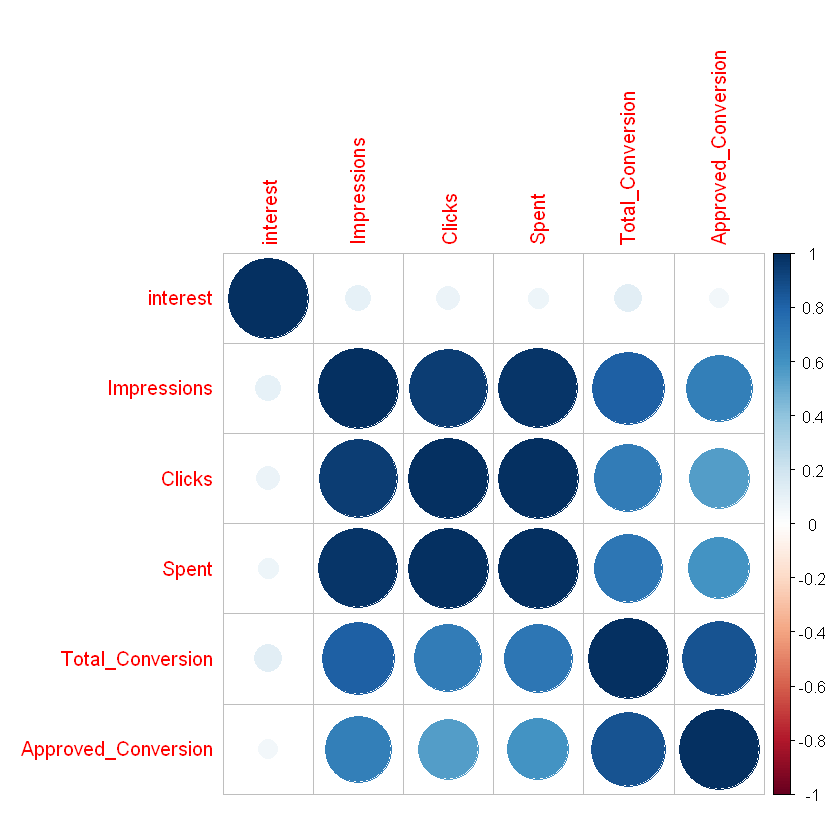

In [13]:
# Create a visualizing of the correlation matrix
corrplot(cor(df[c("interest", "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion")]))

Total Conversion, impresions, and spent are the three most correlated variables with Approved Conversion. Whereas, Interest is the least correlated variable with Approved Conversion.

Impressions, clicks and spent are highly correlated with each other (they do not provide unique or independent information in the regression model). This indicates the presence of multicollinearity and it can cause problems when fitting and interpreting a regression model.

In general, multicollinearity causes two types of problems:

    The coefficient estimates of the model (and even the signs of the coefficients) can fluctuate significantly based on which other predictor variables are included in the model.
    
    The precision of the coefficient estimates are reduced, which makes the p-values unreliable. This makes it difficult to determine which predictor variables are actually statistically significant.
    


**Detecting Multicollinearity**

The most common way to detect multicollinearity is by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model.

A general rule of thumb for interpreting VIFs is as follows:

    A value of 1 indicates there is no correlation between a given predictor variable and any other predictor variables in the model.
    
    A value between 1 and 5 indicates moderate correlation between a given predictor variable and other predictor variables in the model, but this is often not severe enough to require attention.
    
    A value greater than 5 indicates potentially severe correlation between a given predictor variable and other predictor variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

In [14]:
# Fit the regression model
model_1 <- lm(Approved_Conversion ~ interest + Impressions + Clicks + Spent + Total_Conversion, df)

# View the output of the regression model
summary(model_1)


Call:
lm(formula = Approved_Conversion ~ interest + Impressions + Clicks + 
    Spent + Total_Conversion, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7621 -0.3926 -0.2524  0.5997  6.5563 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.103e-01  4.358e-02   2.532  0.01149 *  
interest         -3.001e-03  9.980e-04  -3.007  0.00269 ** 
Impressions       1.287e-06  5.105e-07   2.521  0.01183 *  
Clicks           -6.805e-03  4.608e-03  -1.477  0.14008    
Spent            -5.751e-04  4.054e-03  -0.142  0.88723    
Total_Conversion  3.321e-01  1.096e-02  30.298  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8629 on 1137 degrees of freedom
Multiple R-squared:  0.7545,	Adjusted R-squared:  0.7534 
F-statistic: 698.9 on 5 and 1137 DF,  p-value: < 2.2e-16


We can see from the output that the R-squared value for the model is 0.8629.  We can also see that the overall F-statistic is 698.9 and the corresponding p-value is 2.2e-16, which indicates that the overall regression model is significant. Also, the predictor variables interest, Impresisons and Total_Conversion are statistically significant at the 0.05 significance level while Clicks and Spent are not.

In [15]:
# Calculate the VIF for each predictor variable in the model
vif(model_1)

interest      Impressions           Clicks            Spent 
        1.109822        39.099130       105.438439       190.442805 
Total_Conversion 
        3.705271

We can see that the VIF for Impressions, Clicks and Spent are greater than 5, which is potentially concerning. 

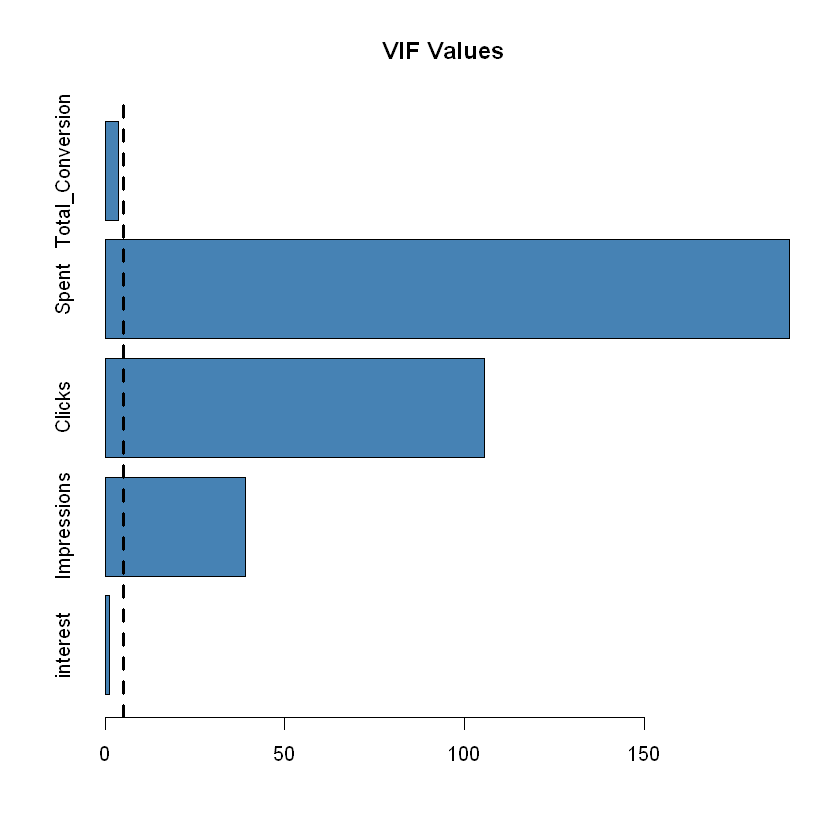

In [16]:
# Visualizing VIF values

# Create vector of VIF values
vif_values <- vif(model_1)

# Create horizontal bar chart to display each VIF value
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")

# Add vertical line at 5
abline(v = 5, lwd = 3, lty = 2)

We can clearly see from the plot which VIF values exceed 5 for each predictor variable.  

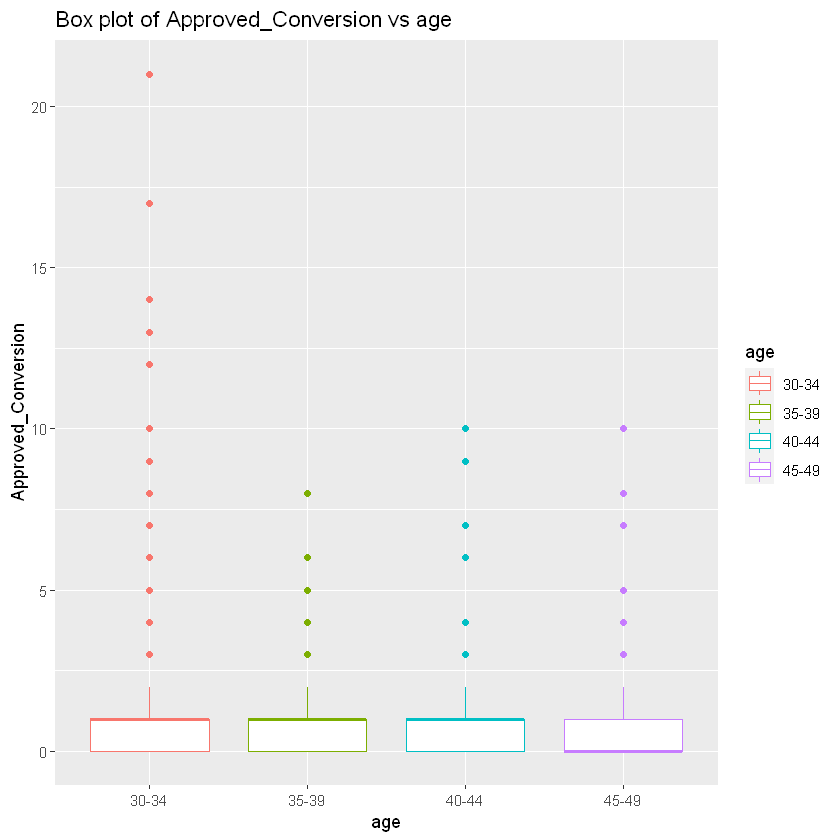

In [17]:
# Bivariate analysis of a continuous-categorical pair

# Look at the relationship between the response variable
# and the categorical variables

# Box plot of Approved_Conversion vs age
ggplot(df, aes(x=age, y=Approved_Conversion, color=age)) + 
    geom_boxplot() + 
    ggtitle("Box plot of Approved_Conversion vs age")

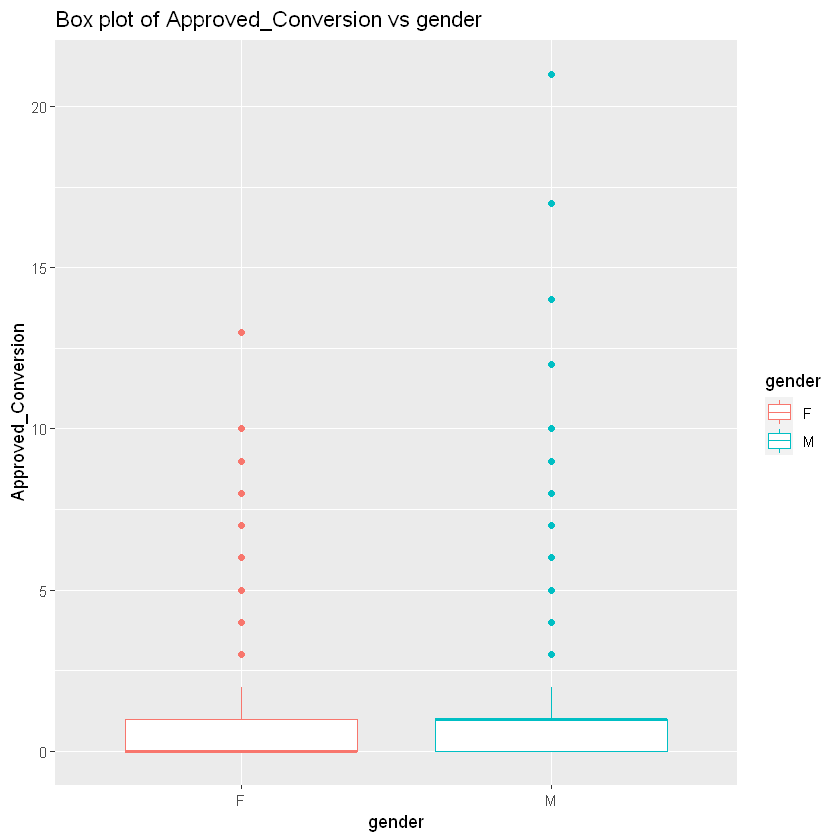

In [18]:
# Box plot of Approved_Conversion vs gender

ggplot(df, aes(x=gender, y=Approved_Conversion, color=gender)) + 
    geom_boxplot() + 
    ggtitle("Box plot of Approved_Conversion vs gender")

Based on the boxplots, there appears to be no relationship between the response, Approved_Conversion, and the qualitative predictors age and sex. 

One approach to evaluate or study the response variable with respect to a categorical variable, in this case, age, is to use the side by side boxplot. That is, for each category we plot a single boxplot of the response variable and we compare the boxplots across all categories (across all ages).

Therefore, we are interested to address the following questions: 

Is there a difference in Approved_Conversion by age category?

Which age category have higher conversions (bought the product) after seeing the ad?

To answer these questions, I will compare whether the mean Approved_Conversion across all ages are different. 


**Hypothesis test for equal means**

Using the hypothesis testing procedure for equal means, we test: The null 
hypothesis, which that the means are all equal (mu 1 = mu 2…=mu k) versus the alternative hypothesis, that some means are different. Not all means have to be different for the alternative hypothesis to be true -- at least one pair of the means needs to be different.


In [19]:
# Hypothesis test for equal means

# Perform an ANOVA F-test on Approved_Conversion among the different age categories
model_aov <- aov(Approved_Conversion~age, data=df)
summary(model_aov)

              Df Sum Sq Mean Sq F value Pr(>F)  
age            3     32   10.57   3.524 0.0146 *
Residuals   1139   3417    3.00                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value of the F-test is 0.0146 which is less than 0.05. Therefore, we can reject the null hypothesis that the means of the age categories are equal, and conclude that at least two means statistically significantly differ from each other.

In [20]:
# Model Comparison

full_model <- lm(Approved_Conversion ~ age + gender + interest + Impressions + Clicks + Spent + Total_Conversion, df)

# Build a second multiple linear regression model (reduced_model) using Approved_Conversion as the response variable, and all variables except age as the predictors. 
# Conduct a partial F-test comparing full_model with reduced_model
reduced_model <- lm(Approved_Conversion ~ gender + interest + Impressions + Clicks + Spent + Total_Conversion, df)

anova(full_model, reduced_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1133,844.5812,NA,NA,NA,NA
1136,844.7070,-3,-0.1257896,0.05624863,0.9824604


The partial-F test p-value is 0.9824604 which is greater than 0.05. Therefore, we can not reject the null hypothesis that the regression coefficients for age variable are zero at an α-level of 0.05. 

We conclude that age did not add explanatory power to the response variable conditional of other predicting variables in the model. Thus, the reduced model offers a statistically better fit than the full model. 

In [21]:
# Hypothesis test for equal means

# Perform an ANOVA F-test on Approved_Conversion among the two gender category
model_aov_2 <- aov(Approved_Conversion~gender, data=df)
summary(model_aov_2)

              Df Sum Sq Mean Sq F value Pr(>F)
gender         1      2   2.216   0.734  0.392
Residuals   1141   3446   3.020               

From the model output we can see that the predictor variable gender is not statistically significant at the .05 significance level.

In other words, there is not a statistically significant difference between the mean approved conversions that results from males and females. 

In [22]:
# Perform an ANOVA F-test on Approved_Conversion among the two gender categories
model_aov_2 <- aov(Approved_Conversion~gender, data=df)
summary(model_aov_2)

              Df Sum Sq Mean Sq F value Pr(>F)
gender         1      2   2.216   0.734  0.392
Residuals   1141   3446   3.020               

The p-value of the F-test is 0.392 which is greater than 0.05. Therefore, we can not reject the null hypothesis that the means of the gender category are equal. 

In [23]:
# Build a second multiple linear regression model (reduced_model_2) using Approved_Conversion as the response variable, and all variables except gender as the predictors. 
# Conduct a partial F-test comparing full_model with reduced_model_2
reduced_model_2 <- lm(Approved_Conversion ~ age + interest + Impressions + Clicks + Spent + Total_Conversion, df)

anova(full_model, reduced_model_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1133,844.5812,NA,NA,NA,NA
1134,846.4048,-1,-1.823533,2.446257,0.1180847


The partial-F test p-value is 0.1180847 which is greater than 0.05. Therefore, we can not reject the null hypothesis that the regression coefficients for gender variable are zero at an α-level of 0.05. 


### **Feature engineering**

In this final step of Exploratory Data Analysis (EDA), I will select the most useful features or create new features from the existing ones.

From the results, we concluded that age and gender were not statistically significant and did not add explanatory power to the response variable conditional of other predicting variables in the model. Therefore, I will not select these variables. 

Moreover, interest has no clear correlation with the response, Approved_Conversion. So I will not select these variable. 

We also concluded that Impressions, Clicks and Spent are highly correlated with each other and their VIF values are greater than 5 which indicates the presence of multicollinearity. This could cause problems in our model. 

To resolve multicollinearity, I will create new variables that encompasses the information from Impressions, Clicks and Spent.

To grow profitably in today’s market, advertisers need to target key conversion metrics and analyze consumers behaviors. 

Some of the KPIs that digital advertisers use to identify prospects who are most likely to convert are: CPC, CPM, and CVR. 

**Cost Per Click (CPC)**: measures the cost you pay for each unique visitor from an online paid media ad.

**Cost Per Mile (CPM)**: is the cost advertisers pay for every thousand impressions during an ad campaign.

**Conversion Rate (CVR)**: refers to the percentage of users who view a mobile ad and click on it before completing some conversion activity.

Therefore, I will create these new variables and use them to predict the total number of people who bought the product after seeing the ad (Approved_Conversion).

In [24]:
# Duplicate dataframe
data <- df

In [25]:
# Create CPC, CPM and CVR variables
cpc <- data$Spent / data$Clicks
cpm <- round(data$Spent / (data$Impressions / 1000), 2)
cvr <- data$Approved_Conversion / data$Total_Conversion

data["CPC"] <- cpc
data["CPM"] <- cpm
data["CVR"] <- cvr

In [27]:
data_2 <- subset(data, select = -c(ad_id, xyz_campaign_id, fb_campaign_id, interest, age, gender, Impressions, Clicks, Spent))

In [28]:
head(data_2)

Total_Conversion,Approved_Conversion,CPC,CPM,CVR
2,1,1.43,0.19,0.5
2,0,0.91,0.10,0.0
1,0,NaN,0.00,0.0
1,0,1.25,0.29,0.0
1,1,1.29,0.31,1.0
1,1,NaN,0.00,1.0


In [29]:
# Count total missing values in each column of the dataframe
sapply(data_2, function(x) sum(is.na(x)))

Total_Conversion Approved_Conversion                 CPC                 CPM 
                  0                   0                 207                   0 
                CVR 
                  8

In [30]:
# Calculate the percentage of missing values in each column
(colMeans(is.na(data_2)))*100

Total_Conversion Approved_Conversion                 CPC                 CPM 
          0.0000000           0.0000000          18.1102362           0.0000000 
                CVR 
          0.6999125

In [ ]:
# # Remove missing values
# data_2 <- na.omit(data_2)

In [31]:
# Fill in missing values with the mean
data_2$CPC[is.na(data_2$CPC)] <- mean(data_2$CPC, na.rm=T)
data_2$CVR[is.na(data_2$CVR)] <- mean(data_2$CVR, na.rm=T)

In [32]:
# Verify whether we handled all missing values
(colMeans(is.na(data_2)))*100

Total_Conversion Approved_Conversion                 CPC                 CPM 
                  0                   0                   0                   0 
                CVR 
                  0

In [33]:
# Create correlation matrix between each pairwise combination of numeric variables (rounded to 3 decimal places) 
# to view the linear correlation coefficients between each pair of variables

round(cor(data_2[c("CPC", "CPM", "CVR", "Total_Conversion", "Approved_Conversion")]),3)

,CPC,CPM,CVR,Total_Conversion,Approved_Conversion
CPC,1.000,-0.020,0.018,0.158,0.166
CPM,-0.020,1.000,-0.001,0.049,0.031
CVR,0.018,-0.001,1.000,-0.014,0.317
Total_Conversion,0.158,0.049,-0.014,1.000,0.864
Approved_Conversion,0.166,0.031,0.317,0.864,1.000


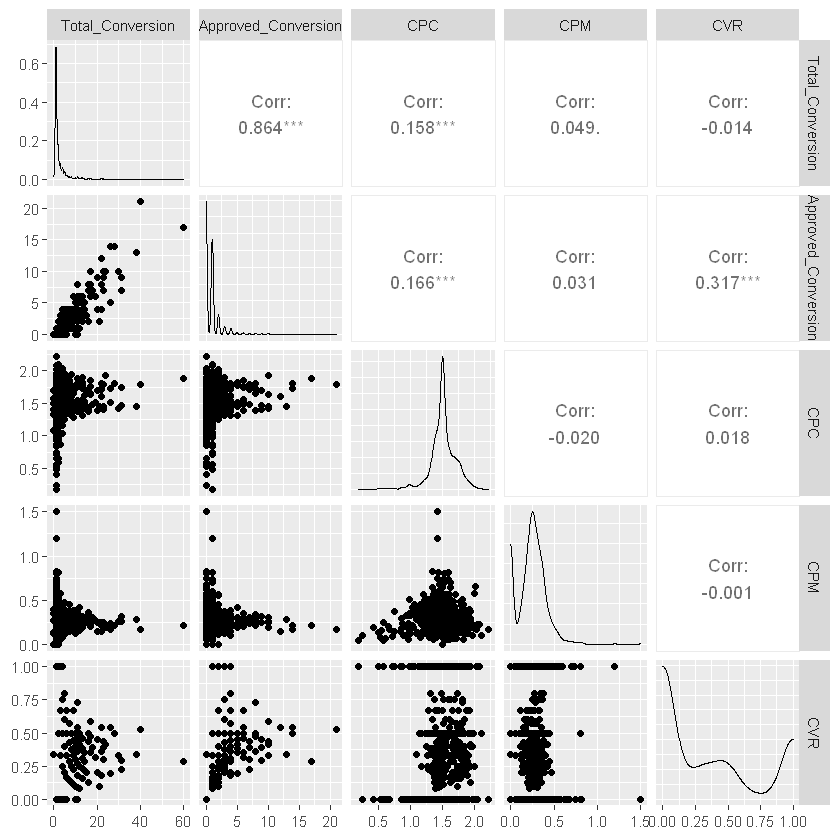

In [44]:
# Use the ggpairs() function to check if the predictor variables have a linear association with the response variable
ggpairs(data_2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


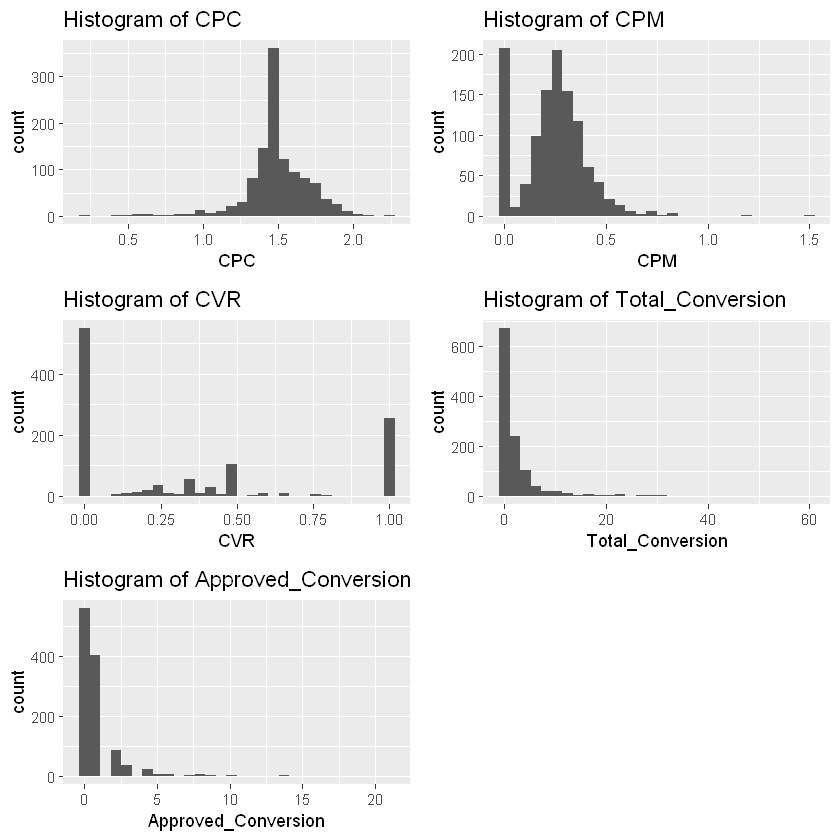

In [34]:
# Univariate visualization of the continuous variables 
# Plot histograms to get a sense of their distribution

h1 <- ggplot(data_2, aes(x=CPC)) + 
    geom_histogram() +
    ggtitle("Histogram of CPC")

h2 <- ggplot(data_2, aes(x=CPM)) + 
    geom_histogram() +
    ggtitle("Histogram of CPM")

h3 <- ggplot(data_2, aes(x=CVR)) + 
    geom_histogram() +
    ggtitle("Histogram of CVR")

h4 <- ggplot(data_2, aes(x=Total_Conversion)) + 
    geom_histogram() +
    ggtitle("Histogram of Total_Conversion")

h5 <- ggplot(data_2, aes(x=Approved_Conversion)) + 
    geom_histogram() +
    ggtitle("Histogram of Approved_Conversion")

ggarrange(h1, h2, h3, h4, h5, ncol=2, nrow=3)

In [35]:
summary(data_2)

 Total_Conversion Approved_Conversion      CPC             CPM        
 Min.   : 0.000   Min.   : 0.000      Min.   :0.180   Min.   :0.0000  
 1st Qu.: 1.000   1st Qu.: 0.000      1st Qu.:1.414   1st Qu.:0.1500  
 Median : 1.000   Median : 1.000      Median :1.499   Median :0.2500  
 Mean   : 2.856   Mean   : 0.944      Mean   :1.499   Mean   :0.2392  
 3rd Qu.: 3.000   3rd Qu.: 1.000      3rd Qu.:1.600   3rd Qu.:0.3300  
 Max.   :60.000   Max.   :21.000      Max.   :2.212   Max.   :1.5000  
      CVR        
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.1667  
 Mean   :0.3391  
 3rd Qu.:0.5455  
 Max.   :1.0000  

### **Modelling**

In [36]:
# Split Data Into Training & Test Set

# Use 70% of dataset as training set and remaining 30% as testing set
sample <- sample(c(TRUE, FALSE), nrow(data_2), replace=TRUE, prob=c(0.7, 0.3))
train <- data_2[sample,]
test <- data_2[!sample,]

In [37]:
# View dimensions of training set
dim(train)

[1] 810   5

In [38]:
# View dimensions of test set
dim(test)

[1] 333   5

In [39]:
head(train)

,Total_Conversion,Approved_Conversion,CPC,CPM,CVR
2,2,0,0.910000,0.10,0
3,1,0,1.499347,0.00,0
5,1,1,1.290000,0.31,1
6,1,1,1.499347,0.00,1
7,1,0,1.590000,0.31,0
8,1,1,1.270000,0.12,1


In [40]:
head(test)

,Total_Conversion,Approved_Conversion,CPC,CPM,CVR
1,2,1,1.430000,0.19,0.5
4,1,0,1.250000,0.29,0.0
10,1,0,1.053333,0.33,0.0
15,1,1,1.468571,0.70,1.0
16,1,1,1.499347,0.00,1.0
17,1,0,0.570000,0.25,0.0


**Model 1: Multiple Linear Regression**

In [46]:
# Fit a multiple linear regression model

# Linear-Linear model
lin_lin_model <- lm(Approved_Conversion~., data = train)
summary(lin_lin_model)


Call:
lm(formula = Approved_Conversion ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7384 -0.2430  0.1121  0.1896  7.0932 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.885251   0.183144  -4.834 1.61e-06 ***
Total_Conversion  0.339491   0.005312  63.916  < 2e-16 ***
CPC               0.268738   0.118472   2.268   0.0236 *  
CPM              -0.138875   0.153676  -0.904   0.3664    
CVR               1.441699   0.063492  22.707  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7155 on 805 degrees of freedom
Multiple R-squared:  0.8548,	Adjusted R-squared:  0.8541 
F-statistic:  1185 on 4 and 805 DF,  p-value: < 2.2e-16


In [49]:
# Log-Linear model
log_lin_model <- lm(log(Approved_Conversion+1)~., data = train)
summary(log_lin_model)


Call:
lm(formula = log(Approved_Conversion + 1) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36706 -0.14078 -0.02931  0.13029  0.67326 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.297460   0.057331  -5.188 2.69e-07 ***
Total_Conversion  0.083509   0.001663  50.224  < 2e-16 ***
CPC               0.157754   0.037086   4.254 2.35e-05 ***
CPM               0.068371   0.048107   1.421    0.156    
CVR               0.822579   0.019875  41.387  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.224 on 805 degrees of freedom
Multiple R-squared:  0.8441,	Adjusted R-squared:  0.8433 
F-statistic:  1090 on 4 and 805 DF,  p-value: < 2.2e-16


In [52]:
# Log-Log model
log_log_model <- lm(log(Approved_Conversion+1) ~ log(Total_Conversion+1) + log(CPC) + log(CPM+1) + log(CVR+1), data = train)
summary(log_log_model)


Call:
lm(formula = log(Approved_Conversion + 1) ~ log(Total_Conversion + 
    1) + log(CPC) + log(CPM + 1) + log(CVR + 1), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06809 -0.07092  0.05423  0.08532  0.70483 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.527898   0.018782 -28.106   <2e-16 ***
log(Total_Conversion + 1)  0.640317   0.009373  68.316   <2e-16 ***
log(CPC)                   0.073666   0.032913   2.238   0.0255 *  
log(CPM + 1)              -0.110883   0.045735  -2.424   0.0155 *  
log(CVR + 1)               1.211063   0.021107  57.376   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.167 on 805 degrees of freedom
Multiple R-squared:  0.9133,	Adjusted R-squared:  0.9129 
F-statistic:  2120 on 4 and 805 DF,  p-value: < 2.2e-16


In [53]:
# Lin-Log model
lin_log_model <- lm(Approved_Conversion ~ log(Total_Conversion+1) + log(CPC) + log(CPM+1) + log(CVR+1), data = train)
summary(lin_log_model)


Call:
lm(formula = Approved_Conversion ~ log(Total_Conversion + 1) + 
    log(CPC) + log(CPM + 1) + log(CVR + 1), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4715 -0.3796  0.0433  0.3957 13.9151 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.82910    0.12317 -14.850  < 2e-16 ***
log(Total_Conversion + 1)  2.16158    0.06147  35.167  < 2e-16 ***
log(CPC)                   0.20865    0.21584   0.967  0.33397    
log(CPM + 1)              -0.77764    0.29992  -2.593  0.00969 ** 
log(CVR + 1)               2.10495    0.13842  15.207  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.095 on 805 degrees of freedom
Multiple R-squared:  0.6596,	Adjusted R-squared:  0.6579 
F-statistic:   390 on 4 and 805 DF,  p-value: < 2.2e-16


From the results we can see that the Log-Log model is the top performing model since it has the highest Adjusted R-squared value.

Its Adjusted R-squared value is 0.9129. This means that 91.29% of the variation in the total number of people who bought the product after seeing the ad (Approved_Conversion), can be explained by the predictor variables in the model. 